In [4]:
import pandas as pd
import torch

In [5]:
domain_names = pd.read_csv('domain_names.csv')

In [16]:
domain_names["sld"] = domain_names["domain_name"].str.split(".").str[0]
domain_names["tld"] = domain_names["domain_name"].str.split(".").str[1]

In [11]:
def get_unique_characters(strings):
    unique_chars = set()
    for string in strings:
        unique_chars.update(set(string))
    return ''.join(unique_chars)


In [17]:
domain_names

,domain_name,sld,tld
0,attargentina.com,attargentina,com
1,jdcreativeky.com,jdcreativeky,com
2,wodlandba.com,wodlandba,com
3,ser-rudimental.com,ser-rudimental,com
4,catalinasgroup.com,catalinasgroup,com
...,...,...,...
99995,rjdworzakestates.com,rjdworzakestates,com
99996,montereybaykillerwhales.com,montereybaykillerwhales,com
99997,barkabledelightshop.com,barkabledelightshop,com
99998,gofacelesswithmj.com,gofacelesswithmj,com


In [74]:
chars = sorted(get_unique_characters(domain_names['sld'].to_list()))
vocab_size = len(chars)
stoi = {char: index+1 for index, char in enumerate(chars)}
stoi['.']=0
itos = {i:s for s,i in stoi.items()}
print(''.join(chars))
print(vocab_size)

-0123456789abcdefghijklmnopqrstuvwxyz
37


In [76]:
N = torch.zeros((38,38), dtype=torch.int32)

In [45]:
domains = domain_names['sld'].to_list()

In [77]:
for domain in domains:
    chs = ['.'] + list(domain) +['.']
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1= stoi[ch1]
        ix2= stoi[ch2]
        N[ix1, ix2] += 1

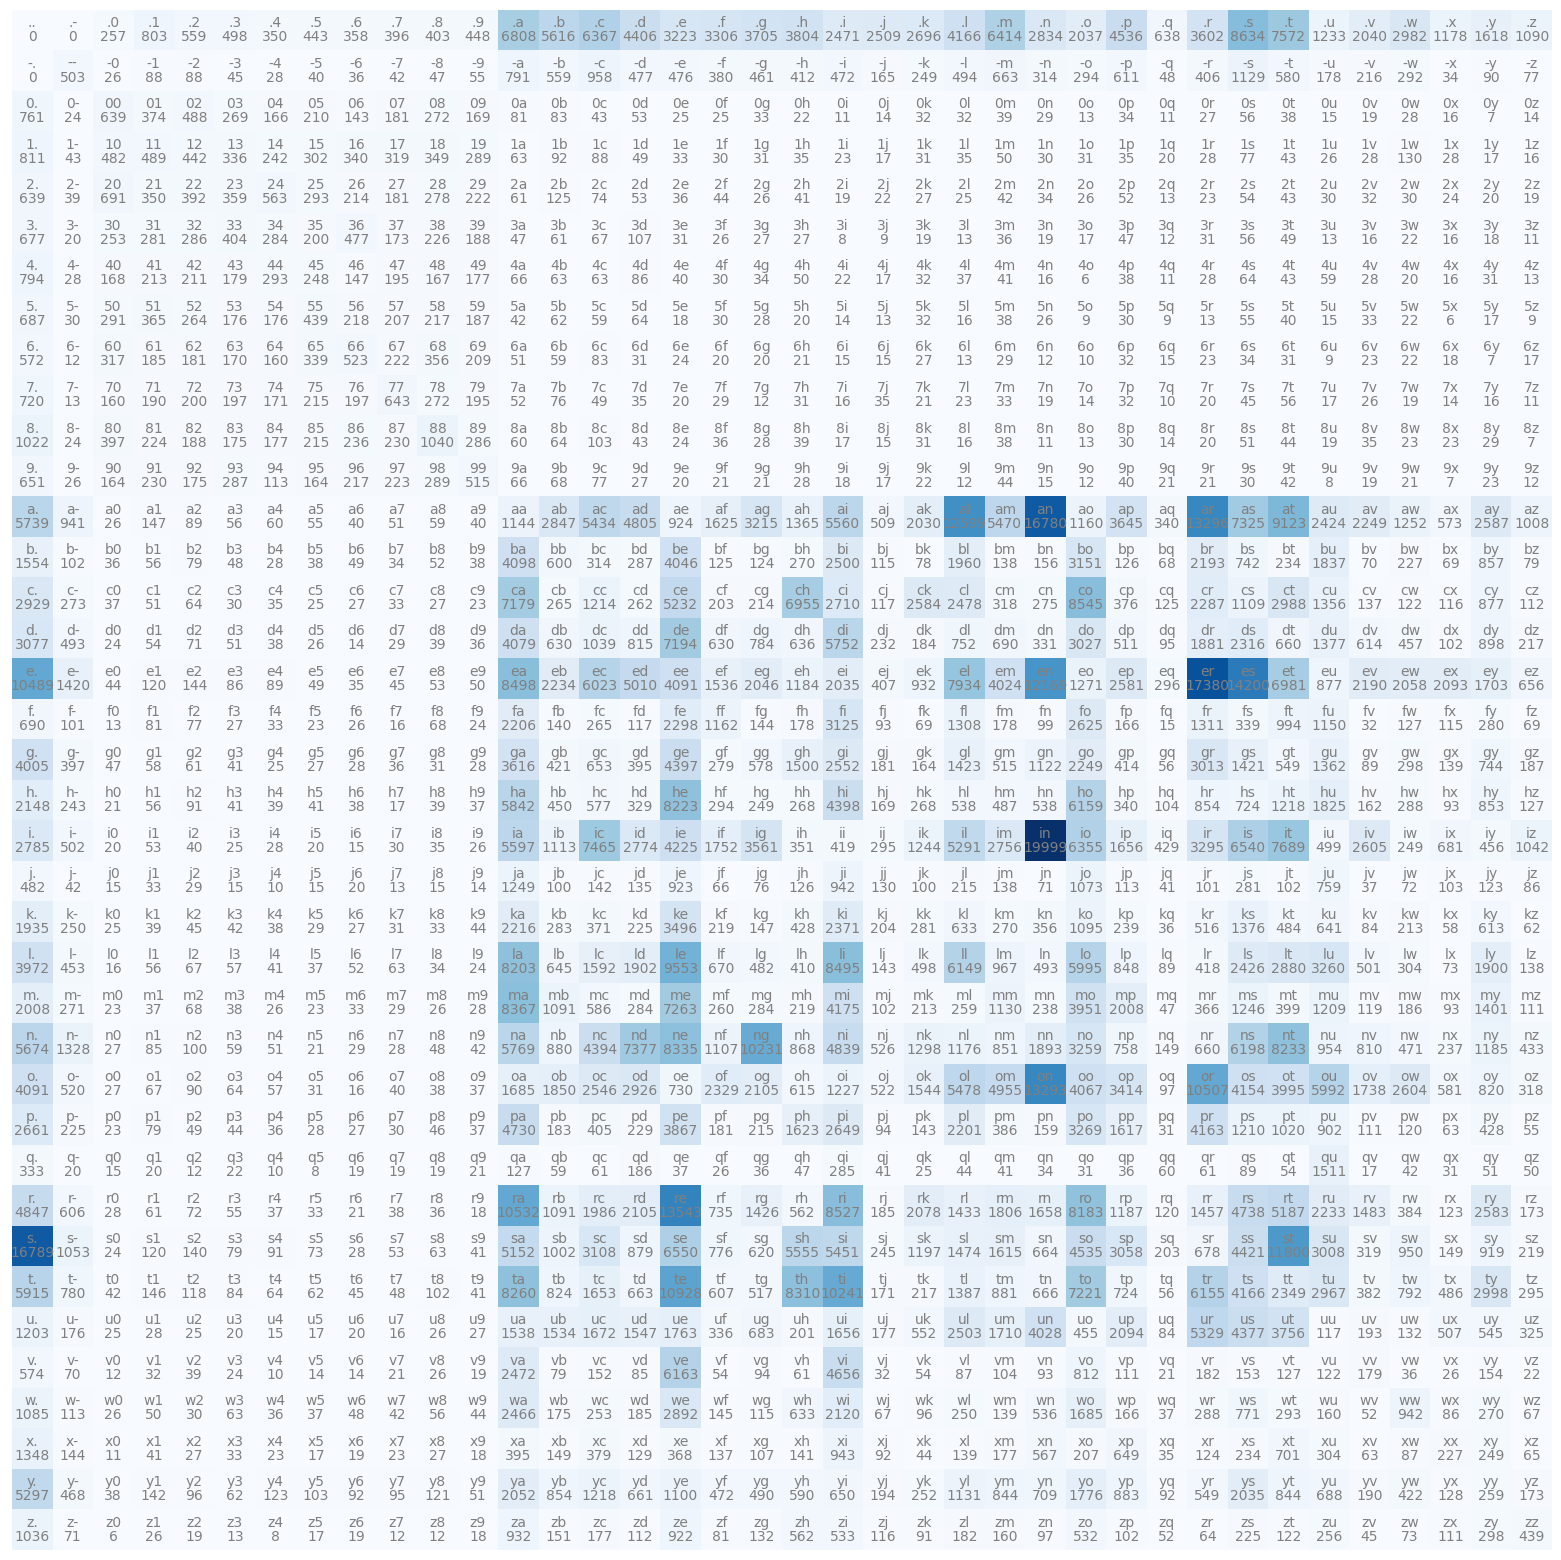

In [80]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(20,20))
plt.imshow(N, cmap='Blues')
for i in range(38):
    for j in range(38):
        chstr = itos[i] + itos[j]
        plt.text(j, i, chstr, ha="center", va="bottom", color='gray')
        plt.text(j, i, N[i, j].item(), ha="center", va="top", color='gray')
plt.axis('off');

In [100]:
P = (N+10000).float()
P /= P.sum(1, keepdims=True)

In [101]:
g = torch.Generator().manual_seed(2147483647)

for i in range(20):
  
  out = []
  ix = 0
  while True:
    p = P[ix]
    ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
    out.append(itos[ix])
    if ix == 0:
      break
  print(''.join(out))

u405yv-dciq0r1v3omq47urorwk4pt3spdllvix30-3274.
lj2esatm8.
fsss9t01nee.
-w5r7gzddamsemasu4zm9ji414.
j8c3c6qom02wce-pcktdsi9g6961t.
9culi.
clbh9nj-ibq86qpuz3z787f-wn1--ma0v.
ins46wf0.
jmwcgdasq.
nyqyoy.
shezvqk58enwc3doxy8nsheihhr.
a.
.
lqytsvg7s60xvh9k27nk.
ad7tcq0b25nw.
r2.
l1-t62pulbao36ti6m6erbuw6qw2r0y8-nandqf4tyzhtpf7u5tyuhc7h7d.
xjk.
xfsgub7bfmftsub80usby3h7vf.
2ath9tms.


In [98]:
log_likelihood = 0.0
n = 0

for domain in domains:
  chs = ['.'] + list(domain) +['.']
  for ch1, ch2 in zip(chs, chs[1:]):
    ix1= stoi[ch1]
    ix2= stoi[ch2]
    log_likelihood += torch.log(P[ix1, ix2])
    n += 1

nll = -log_likelihood
print(f'{nll=}')
print(f'{nll/n}')

nll=tensor(3990248.)
2.871690273284912


In [99]:
log_likelihood = 0.0
n = 0

for domain in ["domains"]:
  chs = ['.'] + list(domain) +['.']
  for ch1, ch2 in zip(chs, chs[1:]):
    ix1= stoi[ch1]
    ix2= stoi[ch2]
    prob = P[ix1, ix2]
    log_probability = torch.log(prob)
    log_likelihood += log_probability
    n += 1
    print(f'{ch1}{ch2}: {prob:.4f} {log_probability:.4f}')

nll = -log_likelihood
print(f'{nll=}')
print(f'{nll/n}')

.d: 0.0434 -3.1371
do: 0.0716 -2.6362
om: 0.0568 -2.8679
ma: 0.2015 -1.6019
ai: 0.0470 -3.0573
in: 0.2100 -1.5607
ns: 0.0748 -2.5928
s.: 0.1943 -1.6381
nll=tensor(19.0920)
2.386505365371704


In [102]:
import torch.nn.functional as F
F.one_hot(torch.tensor([1,2,3]), num_classes=5)

tensor([[0, 1, 0, 0, 0],
        [0, 0, 1, 0, 0],
        [0, 0, 0, 1, 0]])

In [103]:
class Task:
    def __init__(self):
        print(f"__init__ gets called, creating object at {id(self)}")
 
    def __new__(cls):
        new_task = object.__new__(cls)
        print(f"__new__ gets called, creating object at {id(new_task)}")
        return new_task
 
 
task = Task()
# output the following lines:

__new__ gets called, creating object at 6243906320
__init__ gets called, creating object at 6243906320


In [104]:
import keyword

words_to_check = ["def", "class", "self", "lambda"]
for word in words_to_check:
   print(f"Is {word:^8} a keyword? {keyword.iskeyword(word)}")

# output the following lines:


Is   def    a keyword? True
Is  class   a keyword? True
Is   self   a keyword? False
Is  lambda  a keyword? True


In [1]:
!pip install -q sentence_transformers


[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: pip install --upgrade pip


In [2]:
from sentence_transformers import SentenceTransformer
from sentence_transformers.util import cos_sim

# 1. load model
model = SentenceTransformer("mixedbread-ai/mxbai-embed-large-v1")

# For retrieval you need to pass this prompt.
query = 'Represent this sentence for searching relevant passages: A man is eating a piece of bread'

docs = [
    query,
    "A man is eating food.",
    "A man is eating pasta.",
    "The girl is carrying a baby.",
    "A man is riding a horse.",
]

# 2. Encode
embeddings = model.encode(docs)

similarities = cos_sim(embeddings[0], embeddings[1:])
print('similarities:', similarities)


similarities: tensor([[0.7920, 0.6369, 0.1651, 0.3621]])


In [4]:
# Check that MPS is available
import torch
if not torch.backends.mps.is_available():
    if not torch.backends.mps.is_built():
        print("MPS not available because the current PyTorch install was not "
              "built with MPS enabled.")
    else:
        print("MPS not available because the current MacOS version is not 12.3+ "
              "and/or you do not have an MPS-enabled device on this machine.")

else:
    mps_device = torch.device("mps")

    # Create a Tensor directly on the mps device
    x = torch.ones(5, device=mps_device)
    # Or
    x = torch.ones(5, device="mps")

    # Any operation happens on the GPU
    y = x * 2

    # Move your model to mps just like any other device
 



In [5]:
!pip install domaingistry 

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 97.9/97.9 kB 378.0 kB/s eta 0:00:00a 0:00:01
  Created wheel for domaingistry: filename=domaingistry-0.0.2-py3-none-any.whl size=15255 sha256=d5a557c7eb7da727411f7062b578654be66908476644e93416b6b2f93eefa470
  Stored in directory: /Users/ansh/Library/Caches/pip/wheels/d0/3a/1a/6a01177381645f7df3eaa69431f25fa8b94b43b79715714fae
Successfully built domaingistry

[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: pip install --upgrade pip


In [8]:
from domaingistry import Domain
d = Domain('example','common')
d.get_extra()

['example.asia',
 'example.africa',
 'example.us',
 'example.me',
 'example.biz',
 'example.info',
 'example.name',
 'example.mobi',
 'example.cc',
 'example.tv',
 'example.ly',
 'example.tk',
 'example.ml',
 'example.it',
 'example.to',
 'example.eu',
 'example.ch',
 'example.online']

In [7]:
from langchain_community.embeddings import HuggingFaceEmbeddings
from langchain_community.vectorstores.faiss import FAISS
embeddings = HuggingFaceEmbeddings()
def get_tlds():
    with open('TLDs.txt', 'r') as f:
            data = f.read()
    return data.splitlines()
db = FAISS.from_texts(get_tlds(), embeddings)

In [9]:
FAISS.save_local(db, 'tlds.faiss')

In [5]:
from langchain_community.vectorstores.faiss import FAISS
from langchain_community.embeddings import HuggingFaceEmbeddings
embeddings = HuggingFaceEmbeddings()

db=FAISS.load_local('tlds.faiss', embeddings, allow_dangerous_deserialization=True)
[d.page_content for d in db.similarity_search('apples', k=5)]

['flowers', 'pizza', 'food', 'wine', 'app']

In [5]:
from langchain.vectorstores import FAISS
def get_tlds(query):
    db = FAISS.load_local("tlds.faiss", embeddings)
    return [ tld for tld in db.similarity_search_with_score(query, k=5)]

In [1]:
db.similarity_search('apples', k=5)

NameError: name 'db' is not defined

In [6]:
f"""
            You are a domain recommendation system.
            Your objective is to recommend a domain name based on the user's input.
            The domain names should be short, memorable, and relevant to the user's input.

            Only use the following TLDs for your suggestions: {tlds}""" + 
            """
            Here is an example of how to return your results in the following JSON format:
            {
            "output": {
            "person-name": 0,
            "domains": {
            "count": 10,
            "domains": [
                {
                "domain": "ApexSoftware.engineer",
                "sld": "ApexSoftware",
                "tld": "engineer",
                "tldPhase": "GA",
                "exact": 0,
                "registered": 0,
                "premium": 0,
                "adult": 0,
                "sldValue": 1.0,
                "tldValue": 1.0,
                "score": 1.0
                },
                {
                "domain": "ApexSoftware.engineering",
                "sld": "ApexSoftware",
                "tld": "engineering",
                "tldPhase": "GA",
                "exact": 0,
                "registered": 0,
                "premium": 0,
                "adult": 0,
                "sldValue": 1.0,
                "tldValue": 0.94,
                "score": 0.94
                },
                {
                "domain": "ApexSoftware.download",
                "sld": "ApexSoftware",
                "tld": "download",
                "tldPhase": "GA",
                "exact": 0,
                "registered": 0,
                "premium": 0,
                "adult": 0,
                "sldValue": 1.0,
                "tldValue": 0.84,
                "score": 0.84
                },
                {
                "domain": "ApexSoftware.tech",
                "sld": "ApexSoftware",
                "tld": "tech",
                "tldPhase": "GA",
                "exact": 0,
                "registered": 0,
                "premium": 0,
                "adult": 0,
                "sldValue": 1.0,
                "tldValue": 0.65,
                "score": 0.65
                },
                {
                "domain": "ApexSoftware.technology",
                "sld": "ApexSoftware",
                "tld": "technology",
                "tldPhase": "GA",
                "exact": 0,
                "registered": 0,
                "premium": 0,
                "adult": 0,
                "sldValue": 1.0,
                "tldValue": 0.64,
                "score": 0.64
                '},
                '{
                "domain": "ApexSoftware.reviews",
                "sld": "ApexSoftware",
                "tld": "reviews",
                "tldPhase": "GA",
                "exact": 0,
                "registered": 0,
                "premium": 0,
                "adult": 0,
                "sldValue": 1.0,
                "tldValue": 0.56,
                "score": 0.56
                },
                {
                "domain": "Apex-Software.engineer",
                "sld": "Apex-Software",
                "tld": "engineer",
                "tldPhase": "GA",
                "exact": 0,
                "registered": 0,
                "premium": 0,
                "adult": 0,
                "sldValue": 0.5,
                "tldValue": 1.0,
                "score": 0.5
                },
                {
                "domain": "Apex-Software.engineering",
                "sld": "Apex-Software",
                "tld": "engineering",
                "tldPhase": "GA",
                "exact": 0,
                "registered": 0,
                "premium": 0,
                "adult": 0,
                "sldValue": 0.5,
                "tldValue": 0.94,
                "score": 0.47
                },
                {
                "domain": "Apex-Software.download",
                "sld": "Apex-Software",
                "tld": "download",
                "tldPhase": "GA",
                "exact": 0,
                "registered": 0,
                "premium": 0,
                "adult": 0,
                "sldValue": 0.5,
                "tldValue": 0.84,
                "score": 0.42
                },
                {
                "domain": "ApexSoftware.computer",
                "sld": "ApexSoftware",
                "tld": "computer",
                "tldPhase": "GA",
                "exact": 0,
                "registered": 0,
                "premium": 0,
                "adult": 0,
                "sldValue": 1.0,
                "tldValue": 0.42,
                "score": 0.42
                }
            ]
            }
            }
            }

            Only return the JSON and nothing else.
            """

SyntaxError: invalid syntax (985670919.py, line 6)